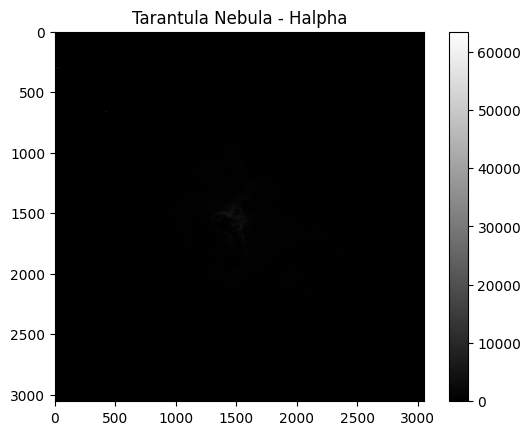

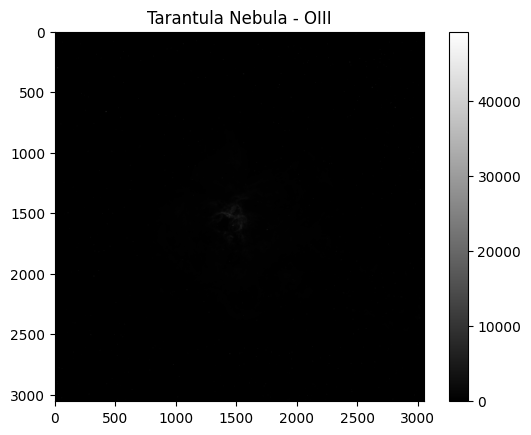

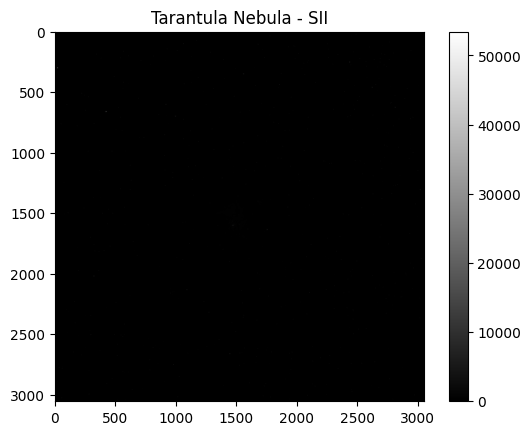

In [17]:
from astropy.io import fits
import matplotlib.pyplot as plt

data = fits.getdata('images/Tarantula_Nebula-halpha.fit')
data2 = fits.getdata('images/Tarantula_Nebula-oiii.fit')
data3 = fits.getdata('images/Tarantula_Nebula-sii.fit')


plt.figure()  
image1 = plt.imshow(data, cmap='gray')
plt.colorbar(image1)
plt.title("Tarantula Nebula - Halpha")
plt.show()


plt.figure()  
image2 = plt.imshow(data2, cmap='gray')
plt.colorbar(image2)
plt.title("Tarantula Nebula - OIII")
plt.show()


plt.figure()  
image3 = plt.imshow(data3, cmap='gray')
plt.colorbar(image3)
plt.title("Tarantula Nebula - SII")
plt.show()


In [18]:
from astroquery.mast import Observations
import numpy as np

# Downloading astrony observations images from MAST with selecting what we want (ex: M51, M31, etc..)
class spaceDownload:
    def __init__(self, download_dir="images"):
        self.download_dir = download_dir

    def search_observations(self, object_name, filters=None):
        print(f"Searching observations for {object_name}...")
        results = Observations.query_object(object_name, radius="0.1 deg")
        if filters:
            results = results[np.isin(results['filters'], filters)]
        print(f"Found {len(results)} results.")
        return results

    def download_observation(self, obs_id):
        print(f"Downloading observation {obs_id}...")
        manifest = Observations.download_products(
            Observations.get_product_list(obs_id),
            download_dir=self.download_dir
        )
        print("Download complete.")
        return manifest

    def stop_download(self):
        self.stop_requested = True
        print("Stop downloading.")

if __name__ == "__main__":
    tool = spaceDownload()

    while True:
        object_name = input("Enter the name of the celestial object to search (or 'STOP' to cancel): ")
        if object_name.upper() == "STOP":
            print("Program stopped.")
            break
        
        results = tool.search_observations(object_name)
        if len(results) > 0:
            for i, result in enumerate(results):
                print(f"[{i}] Obs ID: {result['obsid']}, Target: {result['target_name']}")

            choice = input("Enter the index of the observation to download: ([0][1]etc..)")
            if choice.isdigit() and int(choice) < len(results):
                obs_id = results[int(choice)]['obsid']
                tool.download_observation(obs_id)
            else:
                print("Invalid choice. Please enter a valid index.")
        else:
            print(f"No observations found for {object_name}.")


Searching observations for M51...
Found 33098 results.
[0] Obs ID: 27545566, Target: TESS FFI
[1] Obs ID: 27347170, Target: TESS FFI
[2] Obs ID: 27386992, Target: TESS FFI
[3] Obs ID: 83163378, Target: TESS FFI
[4] Obs ID: 214650609, Target: TESS FFI
[5] Obs ID: 82448156, Target: 288432732
[6] Obs ID: 1628611, Target: M51
[7] Obs ID: 1493597, Target: SN2005cs
[8] Obs ID: 1491575, Target: SN2005cs
[9] Obs ID: 1491576, Target: SN2005cs
[10] Obs ID: 1493598, Target: SN2005cs
[11] Obs ID: 1491758, Target: SN2005cs
[12] Obs ID: 1493982, Target: SN2005cs
[13] Obs ID: 1491577, Target: SN2005cs
[14] Obs ID: 1491759, Target: SN2005cs
[15] Obs ID: 1491781, Target: SN2005cs
[16] Obs ID: 1493984, Target: SN2005cs
[17] Obs ID: 1493599, Target: SN2005cs
[18] Obs ID: 1493600, Target: SN2005cs
[19] Obs ID: 1491780, Target: SN2005cs
[20] Obs ID: 1493983, Target: SN2005cs
[21] Obs ID: 1493613, Target: SN2005cs
[22] Obs ID: 1493985, Target: SN2005cs
[23] Obs ID: 1491782, Target: SN2005cs
[24] Obs ID: 149

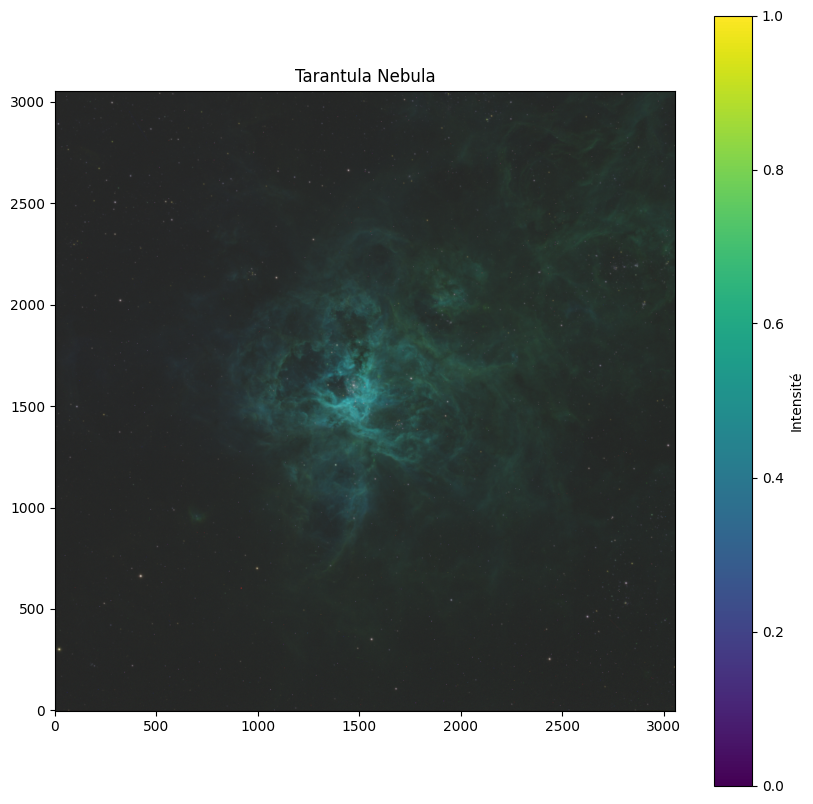

In [1]:
from astropy.io import fits 
from astropy.visualization import (LogStretch, ImageNormalize) 
import matplotlib.pyplot as plt 
import numpy as np 
 
data = fits.getdata('images/Tarantula_Nebula-halpha.fit') 
data2 = fits.getdata('images/Tarantula_Nebula-oiii.fit') 
data3 = fits.getdata('images/Tarantula_Nebula-sii.fit') 
 
#Fixe la même plage d'intensité pour chaque filtre  
vmin = 0 
vmax = max(np.max(data), np.max(data2), np.max(data3)) 
norm = ImageNormalize(data, vmin=vmin, vmax=vmax, stretch=LogStretch()) 
norm2 = ImageNormalize(data2, vmin=vmin, vmax=vmax, stretch=LogStretch()) 
norm3 = ImageNormalize(data3, vmin=vmin, vmax=vmax, stretch=LogStretch()) 
 
 
rgb_image = np.zeros((data.shape[0], data.shape[1], 3)) 
rgb_image[..., 0] = norm3(data3)      
rgb_image[..., 1] = norm(data)   
rgb_image[..., 2] = norm2(data2)    
 
plt.figure(figsize=(10, 10)) 
plt.imshow(rgb_image, origin='lower') 
plt.title("Tarantula Nebula") 
plt.colorbar(label="Intensité") 
plt.show()